In [42]:
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt

%matplotlib inline

moons,_ = datasets.make_moons(noise=0.1,random_state=10)
circles,__ = datasets.make_circles(random_state=10,noise=0.1,factor=0.3)
blobs,___ = datasets.make_blobs(cluster_std=1.5)
moons[:5,:],circles[:5,:],blobs[:5,:]

(array([[ 0.16550775,  0.86994769],
        [ 0.48250292,  0.90707134],
        [-0.87996048,  0.40795917],
        [-0.53749503,  0.55437575],
        [ 0.73393794, -0.32041098]]),
 array([[-0.90882593,  0.61602637],
        [-0.3283682 ,  1.10752711],
        [ 0.68438027, -0.73782108],
        [ 0.1180638 , -1.13933353],
        [ 0.12459672,  0.3061799 ]]),
 array([[ 5.59520842,  9.45579159],
        [-4.04265625, -1.13502859],
        [-6.47408792, -4.36598204],
        [-3.70014925, -0.24489837],
        [-6.63681984, -0.34158224]]))

In [ ]:
# Min-Max 归一化
moons = (moons - np.min(moons)) / (np.max(moons) - np.min(moons))
circles = (circles - np.min(circles)) / (np.max(circles) - np.min(circles))
blobs = (blobs - np.min(blobs)) / (np.max(blobs) - np.min(blobs))

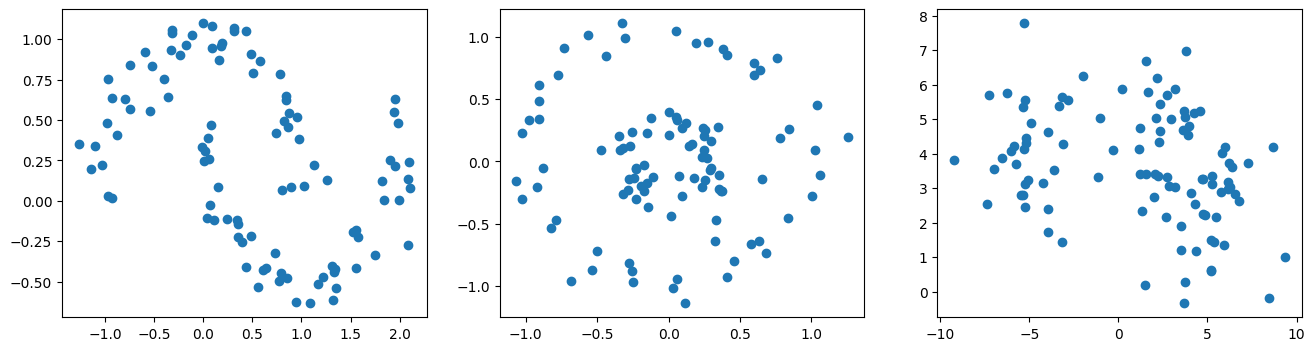

In [39]:

fig, axes = plt.subplots(1, 3, figsize=(16, 4))
axes[0].scatter(moons[:, 0], moons[:, 1])
axes[1].scatter(circles[:, 0], circles[:, 1])
axes[2].scatter(blobs[:, 0], blobs[:, 1])

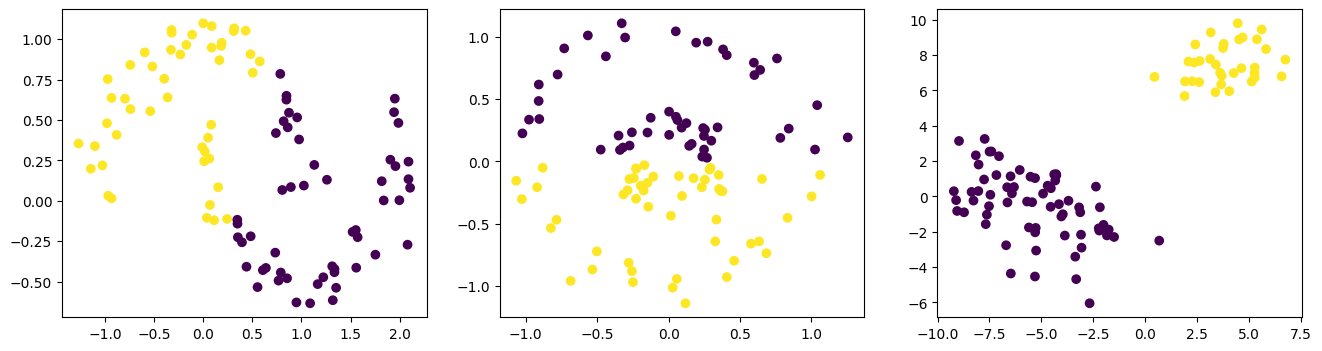

In [57]:
from sklearn.cluster import KMeans,MiniBatchKMeans,AffinityPropagation,MeanShift,SpectralClustering,Birch,DBSCAN

km = KMeans(n_clusters=2)
km_moons = km.fit_predict(moons)
km_circles = km.fit_predict(circles)
km_blobs = km.fit_predict(blobs)

fig, axes = plt.subplots(1, 3, figsize=(16, 4))
axes[0].scatter(moons[:, 0], moons[:, 1],c=km_moons)
axes[1].scatter(circles[:, 0], circles[:, 1],c=km_circles)
axes[2].scatter(blobs[:, 0], blobs[:, 1],c=km_blobs)

In [58]:
mk = MiniBatchKMeans(n_clusters=2)
mk_moons = mk.fit_predict(moons)
mk_circles = mk.fit_predict(circles)
mk_blobs = mk.fit_predict(blobs)

In [59]:
ap = AffinityPropagation()
ap_moons = ap.fit_predict(moons)
ap_circles = ap.fit_predict(circles)
ap_blobs = ap.fit_predict(blobs)

In [60]:
ms = MeanShift()
ms_moons = ms.fit_predict(moons)
ms_circles = ms.fit_predict(circles)
ms_blobs = ms.fit_predict(blobs)

In [62]:
sb = SpectralClustering(n_clusters=2, n_neighbors=6)
sb_moons = sb.fit_predict(moons)
sb_circles = sb.fit_predict(circles)
sb_blobs = sb.fit_predict(blobs)

In [63]:
bi = Birch()
bi_moons = bi.fit_predict(moons)
bi_circles = bi.fit_predict(circles)
bi_blobs = bi.fit_predict(blobs)

In [64]:
db = DBSCAN()
dbdb_moons = db.fit_predict(moons)
db_circles = db.fit_predict(circles)
db_blobs = db.fit_predict(blobs)

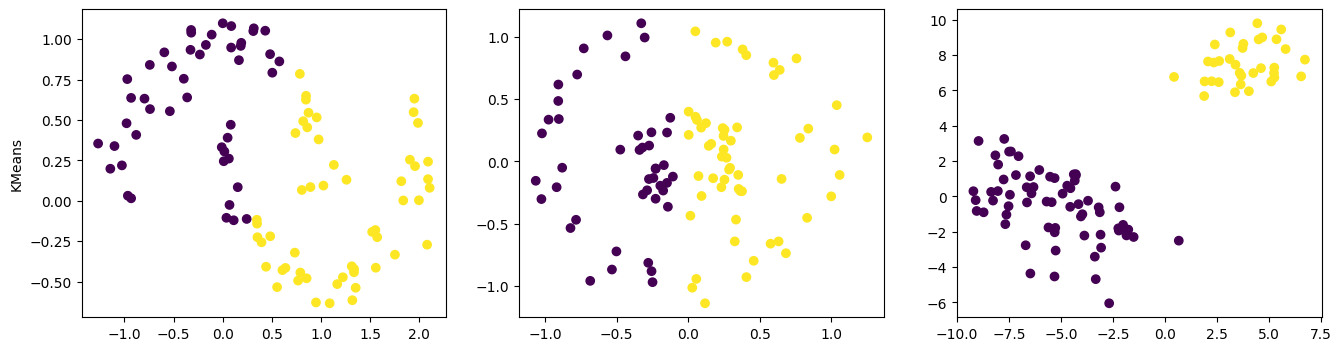

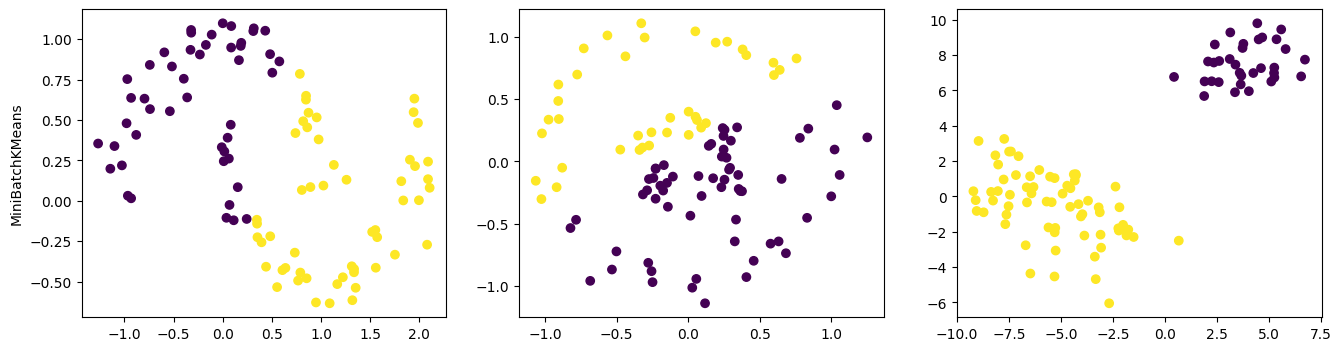

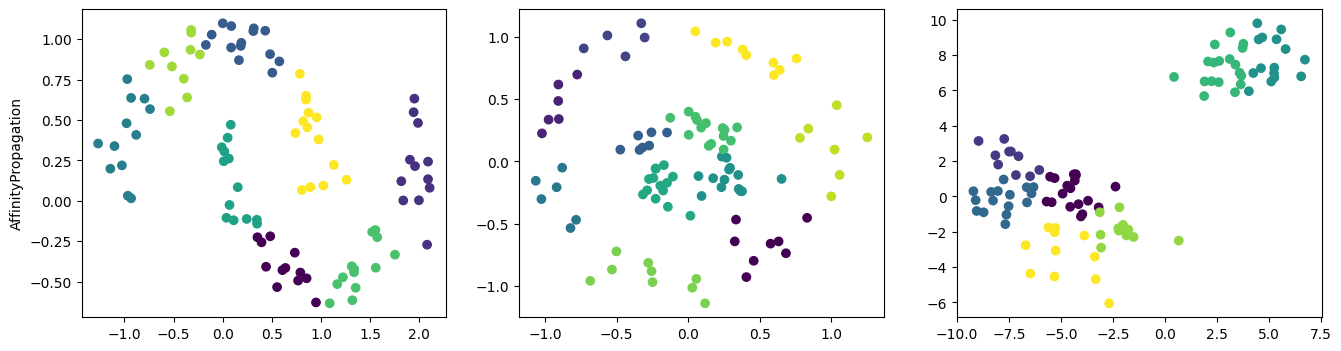

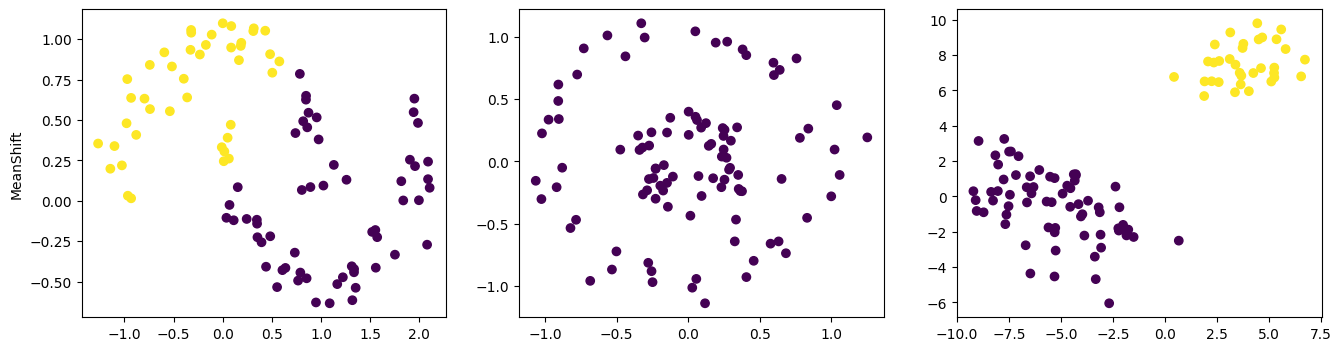

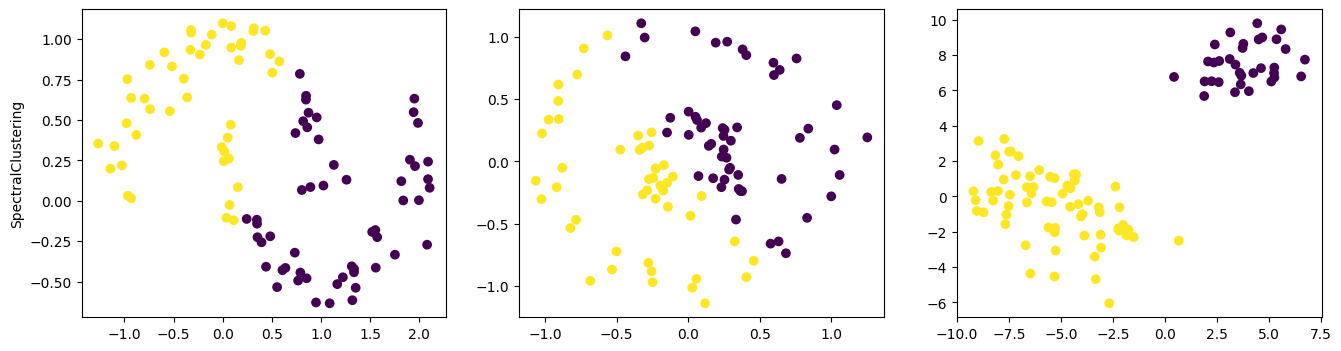

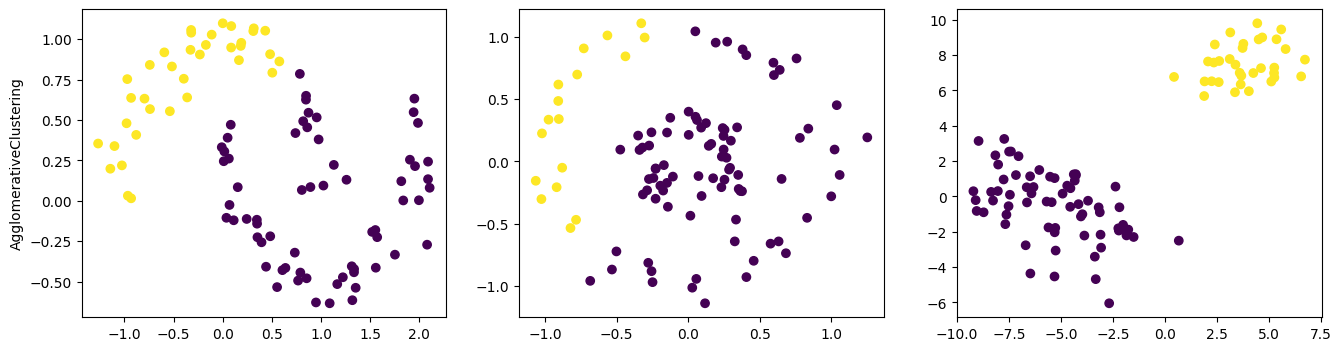

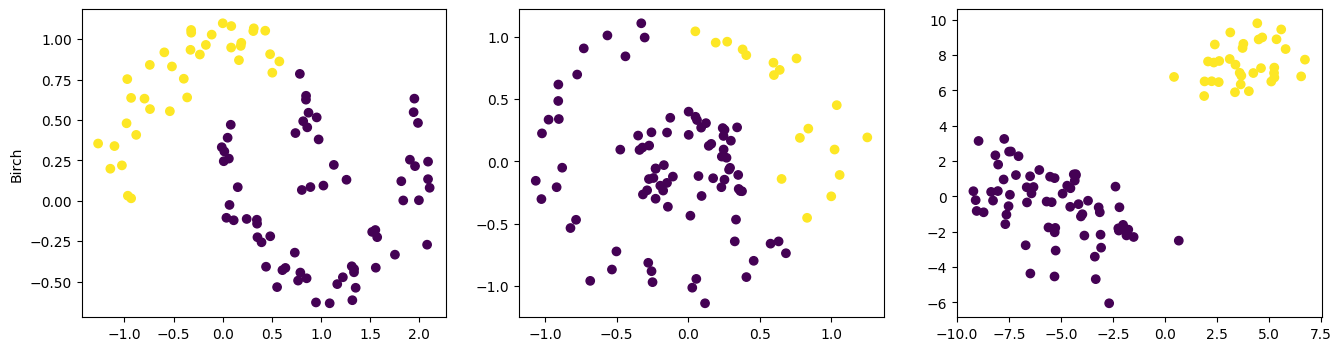

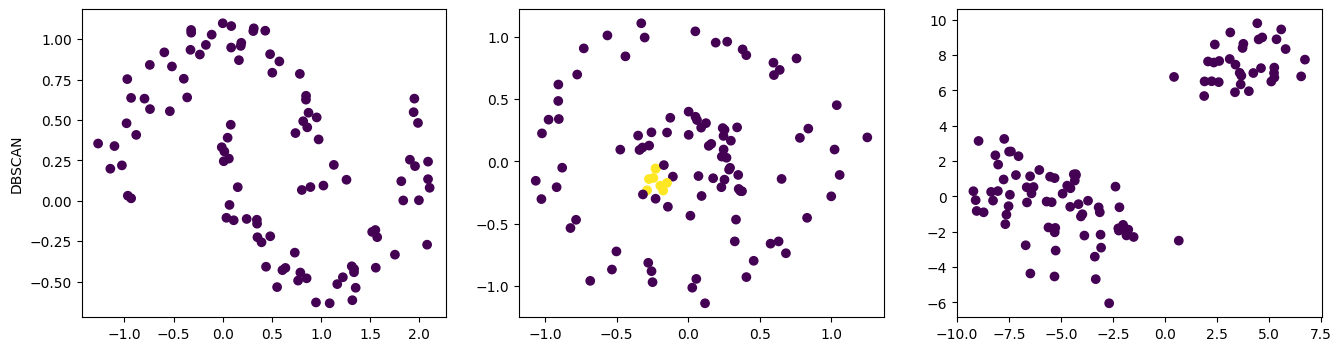

In [66]:
from sklearn import cluster

### 代码开始 ### (> 10 行代码)
cluster_names = ['KMeans', 'MiniBatchKMeans', 'AffinityPropagation', 
                 'MeanShift', 'SpectralClustering', 'AgglomerativeClustering', 'Birch', 'DBSCAN']

cluster_estimators = [
    cluster.KMeans(n_clusters=2),
    cluster.MiniBatchKMeans(n_clusters=2),
    cluster.AffinityPropagation(),
    cluster.MeanShift(),
    cluster.SpectralClustering(n_clusters=2, n_neighbors=6),
    cluster.AgglomerativeClustering(n_clusters=2),
    cluster.Birch(n_clusters=2, threshold=.1),
    cluster.DBSCAN(eps=.1, min_samples=6, metric='euclidean')
]

for algorithm_name, algorithm in zip(cluster_names, cluster_estimators):
    
    moons_clusters = algorithm.fit_predict(moons)
    circles_clusters = algorithm.fit_predict(circles)
    blobs_clusters = algorithm.fit_predict(blobs)
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
    axes[0].scatter(moons[:, 0],moons[:, 1], c=moons_clusters)
    axes[1].scatter(circles[:, 0],circles[:, 1], c=circles_clusters)
    axes[2].scatter(blobs[:, 0],blobs[:, 1], c=blobs_clusters)
    axes[0].set_ylabel('{}'.format(algorithm_name))
### 代码结束 ###

C:\Users\91658\Miniconda3\envs\ml\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
C:\Users\91658\Miniconda3\envs\ml\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
C:\Users\91658\Miniconda3\envs\ml\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
C:\Users\91658\Miniconda3\envs\ml\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
C:\Users\91658\Miniconda3\envs\ml\Lib\site-packages\sklearn\

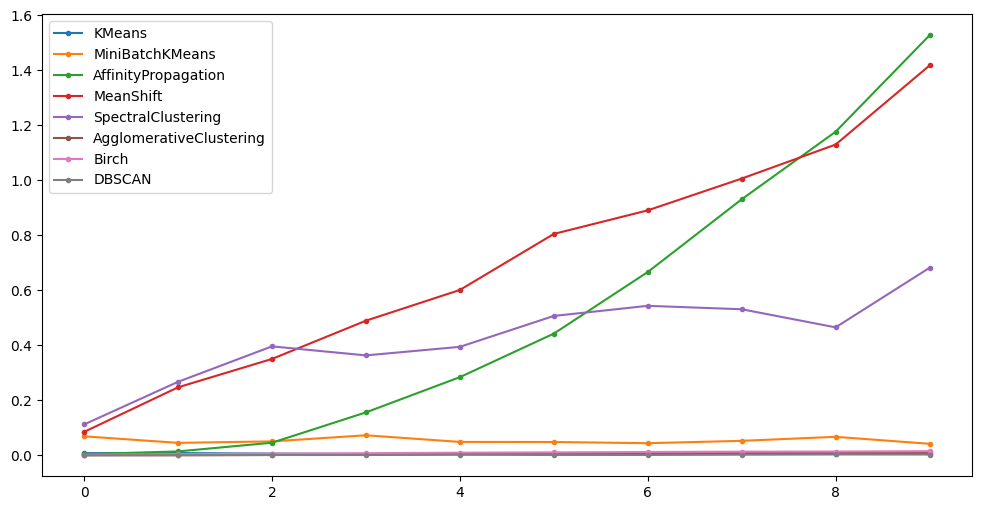

In [71]:
import time
def create_data(n):
    """
    参数:
    n -- 生成样本数量
    返回:
    blobs_data -- 样本数组
    """
    blobs_data, _ = datasets.make_blobs(
        n_samples=n, n_features=2, centers=2, cluster_std=1.5, random_state=10
    )
    return blobs_data


cluster_names = ['KMeans', 'MiniBatchKMeans', 'AffinityPropagation', 
                 'MeanShift', 'SpectralClustering', 'AgglomerativeClustering', 'Birch', 'DBSCAN']


cluster_estimators = [
    cluster.KMeans(n_clusters=2),
    cluster.MiniBatchKMeans(n_clusters=2),
    cluster.AffinityPropagation(),
    cluster.MeanShift(),
    cluster.SpectralClustering(n_clusters=2),
    cluster.AgglomerativeClustering(n_clusters=2),
    cluster.Birch(n_clusters=2),
    cluster.DBSCAN()
]

times = []
for name,e in zip(cluster_names, cluster_estimators):
    tt = []
    for i in range(100,1100,100):
        data = create_data(i)
        t0 = time.time()
        e.fit(data)
        t1 = time.time()
        tt.append(t1 - t0)
    times.append(tt)
    
plt.figure(figsize=(12, 6))
for cluster_t, cluster_name in zip(times, cluster_names):
    plt.plot(cluster_t, marker='.', label=cluster_name)
    plt.legend()

In [ ]:
# Affinity Propagation，Mean Shift 以及 Spectral Clustering 花费时间上升速度较快，也是比较耗时的聚类算法